# Introduction to Spark

### Distributed Computing

- **Cluster**: Collection of systems that work together to perform functions
- **Node**: Individual servers within a cluster


- In order to process large volume of data: **scale *out*** instead of scale up (i.e. distributing the workload to more smaller workers vs. buying a giant expensive machine) 

    + Cheaper: Run large data on clusters of many smaller and cheaper machine
    + Fault-tolerant (Reliable): If one node fails, its workload should be assumed by other components in the system
    + Faster: It *parallelizes* and *distributes* computations
    
 

### MapReduce

- Allow computations to be parallelized over a (Hadoop) cluster
- Process unlimited amount of data that's stored in HDFS by dividing workload into multiple tasks across servers 
- The framework plans **map** tasks to be run on the correct nodes and shuffle data for the **reduce** function  

#### 1. Map - Split & Map: 
-  Take a set of data and convert it into another set of data, where each element is broken into tuple (key-value pair)
- Apply a function to each key-value pair over a portion of data in parallel
- Example: `filter()`

#### 2. Reduce - Shuffle & Reduce: 
- Take the output from a map as input and combine those tuples into smaller set of tuples
- Return one key-value pair from multiple key-value pairs
- Example: `sum()`, `count()`

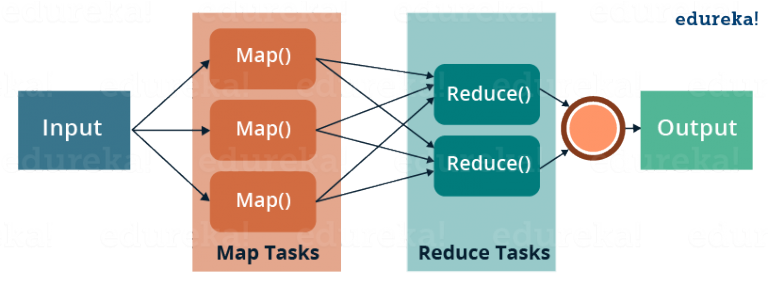

In [6]:
from IPython.display import Image
Image("https://cdn.edureka.co/blog/wp-content/uploads/2016/11/MapReduce-Anatomy-MapReduce-Tutorial-Edureka-1-768x286.png")

#### Process: 

- A MapReduce *job* splits the input data into independent chunks
- They are then processed by the **map** tasks in a completely parallel manner
- The framework sorts the outputs of the maps, which are then input to the **reduce** task
- The framework takes care of **scheduling** the tasks, **monitoring** them and **re-excuting** failed tasks


#### Benefits: 
1. Simplicity: Can write applications in different languages (Java, Python). MapReduce jobs are easy to run.

2. Scalability: Can process petabytes of data, stored in HDFS on one cluster

3. Speed: Parallel processing

4. Recovery:  Takes care of failures. If a machine with 1 copty of data is unavailable, another machine has a copy of the same key-value pair - which can be used to solve the same sub-task. JobTracker keeps track of it. 

5. Minimal Data Motion: Moves computed processes to the data on HDFS and not the other way around. Processing tasks can occur on the physical node where the data resides

#### Example Framework (1): 

Assume you have 5 files, each contains 2 columns: a key and a value that represent the city and a temperature recorded in that city for various days (i.e. city = key and temperature = value). Each file might have the same city represented twice. 

The goal is find the maximum temperature for each city across all the data files. 

Using the MapReduce framework: 

- Break this into five **map** tasks - each mapper works on one of the 5 files
- The mapper goes through the data and returns the maximum for each city
- Assume the five mapper tasks return the following result: 

```python
(Toronto, 20) (Whitby, 25) (New York, 22) (Rome, 33)(Toronto, 18) (Whitby, 27) (New York, 32) (Rome, 37)(Toronto, 32) (Whitby, 20) (New York, 33) (Rome, 38)(Toronto, 22) (Whitby, 19) (New York, 20) (Rome, 31)(Toronto, 31) (Whitby, 22) (New York, 19) (Rome, 30)
```

- All five of these output streams will be fed into the **reduce** tasks - which combines the input results and output a single value for each city: 

```python
(Toronto, 32) (Whitby, 27) (New York, 33) (Rome, 38)
```

#### Example Framework (2): 

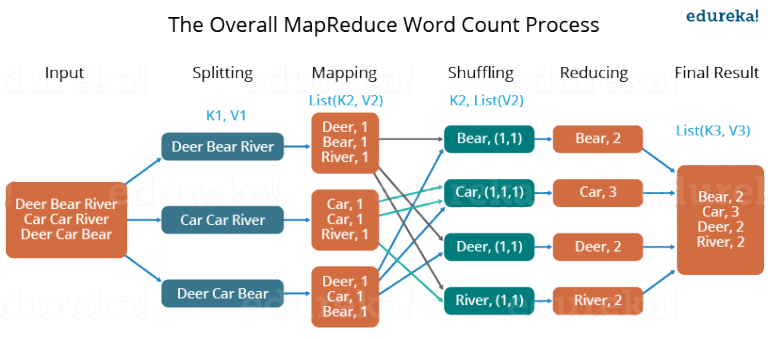

In [7]:
Image("https://cdn.edureka.co/blog/wp-content/uploads/2016/11/MapReduce-Way-MapReduce-Tutorial-Edureka-768x339.png")

### Hadoop MapReduce

- Open-source, distributed, Java computation framework
- Consisting of 
(1) Hadoop Common 
(2) Hadoop Distributed File System 
(3) YARN
(4) MapReduce

- Hadoop was initially composed of 2 concepts:  
    1. Storage (**HDFS**): A distributed file system that stores files in large blocks that are replicated to separate nodes to recover from disk or node failures
    2. MapReduce: A programming framework that allows us to perform distributed and parallel processing on large data sets in a distributed environment
    
    
- Note that since then, Hadoop has been extended with a number of different projects, namely Spark which is an in-memory paradigm that and produce faster processing than MapReduce

#### Benefits 
- Distribution: Distribute the data
- Parallelism: Perform subsets of computation simultaneously
- Fault Tolerance: Handle component failure

#### Limitations
- Powerful but can be slow
    - Slow with iterative algorithms: MapReduce job results stored in HDFS (i.e. disk) before they can be used for another job
- MapReduce's two-step paradigm don't fit for all problems
- Low-level framework

### What is Apache Spark?

- Open-source distributed data processing engine for batch and streaming modes
- Extends the MapReduce model with primitives for efficient data sharing (using RDDs) 
- Supporting languages: Scala, Java, Python, R

- Speed:  
    - Hadoop: **Two-stage** disk-based MapReduce computation engine
    - Spark: **Multi-stage** in-memory computing engine  
    ==> Allows for running most computation in **memory**   
    ==> Better performance for iterative algorithms, interactive data mining and others that need to reuse data
    - Also more efficient than MapReduce for complex applications running on disk  
    

- Generality: 
    - Cover wide range of workloads that previously required separated distributed systems
    - Include: batch applications, iterative algorithms, interative queries & streaming
    - Support these workloads in the same engine --> easy and inexpensive to **combine** different processing types


- "Apache Spark project is an umbrella for SQL (with Datasets), streaming, machine learning (pipelines) and graph processing engines built atop Spark Core. You can run them all in a single application using a consistent API."

### Key Features of Spark

#### Speed
- Run programs up to 100x faster than Hadoop MapReduce in memory, 10x faster on Disk
- Has an advanced DAG execution engine that supports cyclic data flow and in-memory computing
    + DAG (Directed Acyclic Graph) in Apache Spark is a set of Vertices and Edges, where vertices represent the RDDs and the edges represent the Operation to be applied on RDD


#### Ease of Use
- Write applications quickly in Java, Scala, Python, R
- Offer over 80 high-level operators --> easy to build parallel apps
- So, allow developer to focus on logic ratger than infrastructure
- Developer can use Spark interactively from Scala, Python, R shells

#### Generality
- Combine SQL, streaming & complex analytics
- Power a stack of libraries including: SQL, MLib, GraphX & Spark Streaming
- Can combine these libraries seamlessly in the same application

#### Runs everywhere
- Run on Hadoop, Mesos, standalone or in the cloud
     + standalone cluster mode
     + Hadoop YARN
     + Apache Mesos
- Access diverse data sources: HDFS, Cassandra, HBase, Amazon S3 or any Hadoop data source

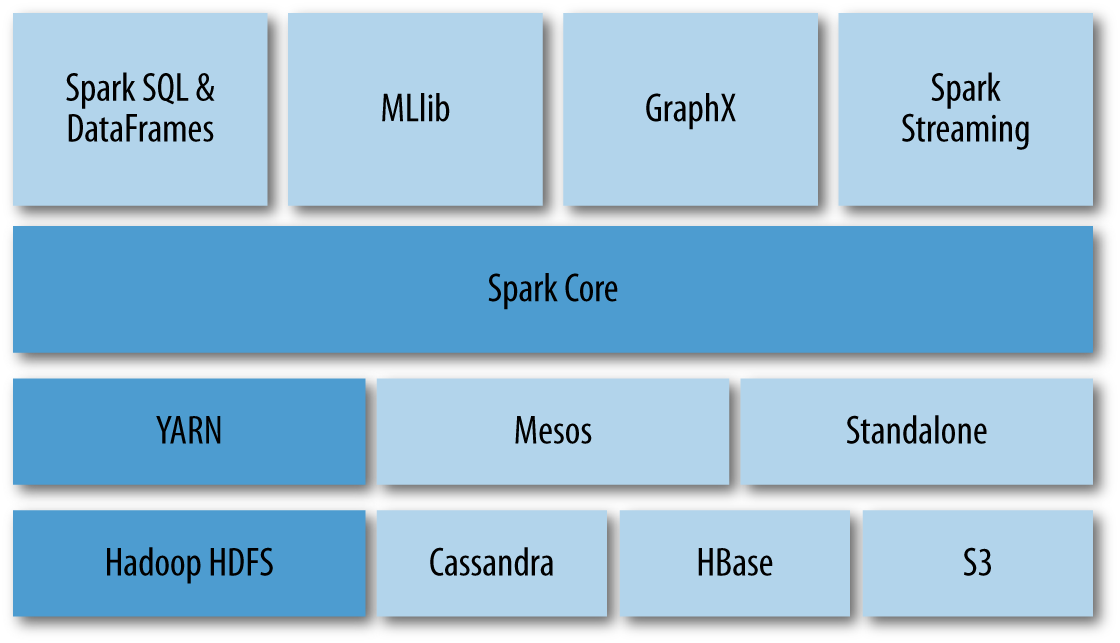

In [8]:
Image("https://www.safaribooksonline.com/library/view/data-analytics-with/9781491913734/assets/dawh_0401.png")

### Spark vs. Hadoop Processing

| Features            | Hadoop MapReduce                | Spark
| :-------------------|:--------------------------------|:---------------------------------
| **Speed**           | Decently fast                   | 100x faster
| **Ease of use**     | No inractive mode + Hard to use | Interactive mode + Easy to learn
| Costs               | Open-source                     | Open-source
| **Data Processing** | Batch processing                | Batch processing + Streaming
| Fault Tolerance     | Fault-Tolerant                  | Fault-Tolerant
| Security            | Kerberos authentication         | Password authentication

#### Hadoop 
+ Distributes massive data collections across multiple nodes within a cluster of commodity server
+ Indexes and keep track of that data
+ Enables big-data processing and analytics more effectively 
    
#### Spark 
+ Data-processing tool that operates on those distributed data collection
+ Spark can create distributed datasets from any file stored in the Hadoop distributed filesystem (HDFS) or other storage systems supported by the Hadoop APIs (including your local filesystem, Amazon S3, Cassandra, Hive, HBase, etc.)
+ **Spark does not require Hadoop; it simply has support for storage systems implementing the Hadoop APIs**


### Spark Components

- Tight intergration: Spark project contains multiple closely intergrated components
- Powers multiple higher-level compoments specialized for various workloads
- Components are designed to interporate closely - let you combine them like libraries 

#### Spark Core

- contain basic functionality of Spark required for running jobs and needed by other components
    + networking
    + security
    + scheduling
    + data shuffling
- home to the API that defines resilient distributed datasets (RDDs)
- **Resilient Distributed Datasets (RDDs)**: collection of items distributed across many compute nodes that can be manipulated in parallel 
- logic for accessing various filesystems including HDFS


#### Spark SQL 

- provide functions for manipulating large sets of distributed, structured data using a SQL subset
- use `DataFrames` and `DataSets`
- transfer operations on `DataFrames` and `DataSets` to operations on RDDs
- tightly integrated with rich computing environment
- data sources include: Hive, JSON, relational databases, NoSQL databases


#### Spark Streaming

- provide an API for manipulating data streams that closely match Spark Core's RDD API
- enables processing of live streams of data from various sources: HDFS, Kafka, Twitter, etc. 
- recover from failure automatically
- stream data using **discretized** streams (Dstreams) - which periodically create RDDs containing data that came in during the last time window


#### Spark MLib & ML

- library of machine learning algorithms
- include: logistic regression, naive Bayes, SVM, decision trees, random forests, linear regression & k-means clustering
- MLib: RDD-based API
- Spark ML: DataFrame-based API


#### Spark GraphX

- provide functions for building graphs, represented as graph RDDs: `EdgeRDD` and `VertexRDD`
- graphs example: a social network’s friend graph
- contain algorithms of graph theory: e.g. Page Rank, SVD++, shortest paths, connected components